In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
#initialize dataframe for saving the accuracies into csv file
df = pd.DataFrame({'90%': [],
                    '80%': [],
                    '70%': [],
                    '60%': [],
                    '50%': []})

In [106]:
acc = []
model = []
#Load dataset
crops = pd.read_csv('input/Crop_recommendation.csv')

X=crops[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]  # input values
Y=crops['label']  # output

test_train_ratio = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_train_ratio, shuffle=True)
test_train_ratio = 0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=test_train_ratio, shuffle=True)
test_train_ratio = 0.3
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=test_train_ratio, shuffle=True)
test_train_ratio = 0.4
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, Y, test_size=test_train_ratio, shuffle=True)
test_train_ratio = 0.5
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, Y, test_size=test_train_ratio, shuffle=True)

In [107]:
#K-nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
def knearest(xtrain, xtest, ytrain, ytest):
    error1=[]
    error2=[]
    for k in range(1,10):
      k_nn = KNeighborsClassifier(n_neighbors=k)
      k_nn.fit(xtrain,ytrain)
      y_pred1 = k_nn.predict(xtrain)
      error1.append(np.mean(ytrain!=y_pred1, keepdims=False))
      y_pred2 = k_nn.predict(xtest)
      error2.append(np.mean(ytest!=y_pred2, keepdims=False))
    plt.plot(range(1,10),error1,label='train')
    plt.plot(range(1,10),error2,label='test')
    plt.xlabel('K - Value')
    plt.ylabel('Error')
    plt.legend()

In [108]:
from sklearn.preprocessing import MinMaxScaler
def analysis(xtrain, xtest, ytrain, ytest):
    norm = MinMaxScaler().fit(xtrain)
    X_train_norm = norm.transform(xtrain)
    X_test_norm = norm.transform(xtest)

    knn = KNeighborsClassifier(n_neighbors=8)
    knn.fit(X_train_norm,ytrain)
    predicted_values = knn.predict(X_test_norm)

    x = metrics.accuracy_score(ytest, predicted_values)

    acc.append(x)                         #accuracy
    print("KNN's Accuracy is: ", x)

    print(classification_report(ytest,predicted_values))
    return x

KNN's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        11
      banana       1.00      1.00      1.00         9
   blackgram       0.91      1.00      0.95        10
    chickpea       1.00      1.00      1.00        10
     coconut       1.00      1.00      1.00        13
      coffee       1.00      1.00      1.00         9
      cotton       1.00      1.00      1.00        10
      grapes       1.00      1.00      1.00         9
        jute       0.90      1.00      0.95         9
 kidneybeans       1.00      1.00      1.00         6
      lentil       1.00      0.92      0.96        13
       maize       1.00      1.00      1.00         6
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      1.00      1.00        12
    mungbean       1.00      1.00      1.00         7
   muskmelon       1.00      1.00      1.00         8
      orange       1.00      1.00      1.00

0.990909090909091

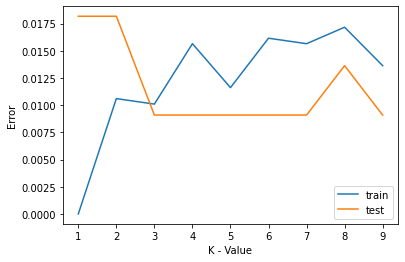

In [109]:
knearest(X_train, X_test, y_train, y_test)
analysis(X_train, X_test, y_train, y_test)

KNN's Accuracy is:  0.9636363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        18
   blackgram       0.83      1.00      0.90        19
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        26
      coffee       1.00      0.96      0.98        24
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        20
        jute       0.67      1.00      0.80        14
 kidneybeans       0.92      1.00      0.96        22
      lentil       0.95      0.82      0.88        22
       maize       1.00      1.00      1.00        17
       mango       0.94      1.00      0.97        16
   mothbeans       0.94      0.89      0.91        18
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.0

0.9636363636363636

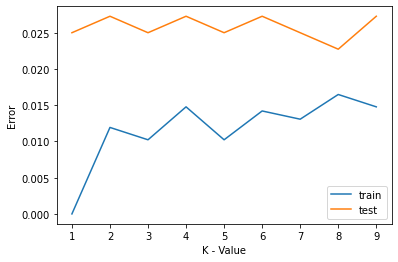

In [110]:
knearest(X_train1, X_test1, y_train1, y_test1)
analysis(X_train1, X_test1, y_train1, y_test1)

KNN's Accuracy is:  0.9606060606060606
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        27
      banana       1.00      1.00      1.00        31
   blackgram       0.83      1.00      0.91        30
    chickpea       1.00      1.00      1.00        33
     coconut       1.00      1.00      1.00        28
      coffee       1.00      1.00      1.00        30
      cotton       0.98      1.00      0.99        41
      grapes       1.00      1.00      1.00        27
        jute       0.74      1.00      0.85        32
 kidneybeans       0.96      1.00      0.98        26
      lentil       0.90      0.90      0.90        29
       maize       1.00      0.97      0.98        33
       mango       0.93      1.00      0.97        28
   mothbeans       1.00      0.84      0.91        31
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        35
      orange       1.00      0.97      0.9

0.9606060606060606

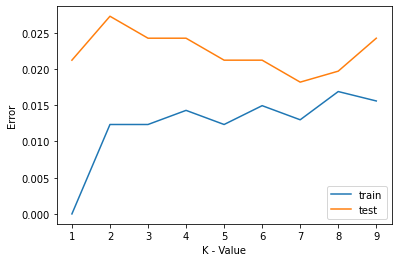

In [111]:
knearest(X_train2, X_test2, y_train2, y_test2)
analysis(X_train2, X_test2, y_train2, y_test2)

KNN's Accuracy is:  0.9670454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        42
      banana       1.00      1.00      1.00        43
   blackgram       0.84      1.00      0.91        43
    chickpea       1.00      1.00      1.00        48
     coconut       1.00      1.00      1.00        34
      coffee       1.00      1.00      1.00        43
      cotton       0.93      1.00      0.96        37
      grapes       1.00      1.00      1.00        43
        jute       0.84      1.00      0.92        49
 kidneybeans       0.96      1.00      0.98        43
      lentil       0.93      0.88      0.90        42
       maize       1.00      0.93      0.96        43
       mango       0.95      1.00      0.97        37
   mothbeans       0.97      0.87      0.92        38
    mungbean       1.00      1.00      1.00        38
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      0.97      0.9

0.9670454545454545

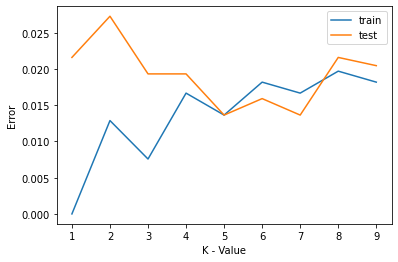

In [112]:
knearest(X_train3, X_test3, y_train3, y_test3)
analysis(X_train3, X_test3, y_train3, y_test3)

KNN's Accuracy is:  0.9618181818181818
              precision    recall  f1-score   support

       apple       0.98      1.00      0.99        52
      banana       1.00      1.00      1.00        49
   blackgram       0.74      1.00      0.85        52
    chickpea       1.00      1.00      1.00        50
     coconut       1.00      1.00      1.00        47
      coffee       1.00      1.00      1.00        42
      cotton       0.96      1.00      0.98        44
      grapes       1.00      0.98      0.99        46
        jute       0.81      1.00      0.90        52
 kidneybeans       0.93      1.00      0.96        54
      lentil       0.94      0.76      0.84        58
       maize       1.00      0.96      0.98        50
       mango       1.00      1.00      1.00        46
   mothbeans       0.98      0.96      0.97        47
    mungbean       0.98      1.00      0.99        53
   muskmelon       1.00      1.00      1.00        54
      orange       1.00      1.00      1.0

0.9618181818181818

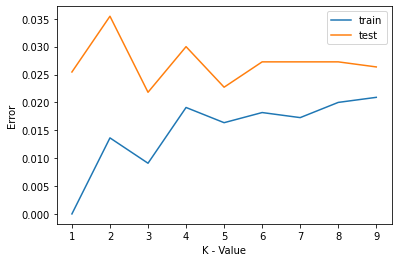

In [113]:
knearest(X_train4, X_test4, y_train4, y_test4)
analysis(X_train4, X_test4, y_train4, y_test4)

In [114]:
print(acc)

[0.990909090909091, 0.9636363636363636, 0.9606060606060606, 0.9670454545454545, 0.9618181818181818]


In [104]:
#add new results to dataframe, repeat this 10 times
df.loc[len(df.index)] = [acc[0], acc[1], acc[2], acc[3], acc[4]]
print(df)

        90%       80%       70%       60%       50%
0  0.977273  0.965909  0.981818  0.973864  0.965455
1  0.986364  0.975000  0.969697  0.968182  0.973636
2  0.981818  0.975000  0.978788  0.968182  0.966364
3  0.977273  0.981818  0.974242  0.965909  0.966364
4  0.990909  0.959091  0.975758  0.973864  0.964545
5  0.981818  0.970455  0.978788  0.972727  0.970909
6  0.981818  0.981818  0.978788  0.977273  0.971818
7  0.990909  0.970455  0.963636  0.967045  0.970909
8  0.986364  0.972727  0.965152  0.970455  0.959091
9  0.963636  0.977273  0.965152  0.975000  0.970909


In [105]:
#save latest dataframe to csv file
df.to_csv('input/knn_accuracies.csv', index=False, mode='w')